In [14]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 3: Visualization
## Due Date: Monday, October 21st, 11:59PM

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Collaborators**: *list  collaborators here*

## Introduction

Atmospheric loading of radiative ("greenhouse") gases, such as Carbon Dioxide and Methane, is having an increasingly apparent effect on global climate. One of the more straightforward consequences of this process is an increase in average temperatures. With few exceptions, this effect can be detected wherever you look at temperatures through time. However, there are other potential consequences of climate change as well, such as shift in patterns of rainfall. Unlike temperature, how rainfall will change with time is more challenging to predict, and might be more variable from one place to another. 

*NOTE*: You can make all plots using any combination of `matplotlib` and `seaborn`. **You will need to refer to each package's respective documentation (e.g. [seaborn](https://seaborn.pydata.org/index.html)) for this homework**. For example, the [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html) for `regplot` will have some useful examples that can help you on question 2. This is a common practice that should become familiar to you; there are many types of plots and many ways to alter their aesthetics, and learning how to figure these things out from the documentation is an essential skill.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
ap_temp = pd.read_csv("ap_temp.csv")
ap_temp.tail()

,Year,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR,Airport
122,2018,18.0,23.0,14.2,208.79,12.0,37.0,0.0,2.0,44.0,0.0,0.0,LAX
123,2019,17.4,22.3,13.5,462.49,12.3,58.0,0.0,6.0,27.0,0.0,0.0,LAX
124,2020,17.7,23.1,13.7,224.52,11.4,33.0,0.0,2.0,60.0,0.0,0.0,LAX
125,2021,16.6,21.7,12.9,316.21,11.8,40.0,0.0,4.0,37.0,0.0,0.0,LAX
126,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAX


#### Question 1

Create a scatterplot of Temperature (y; units are in C; column 'T' in the data) as a function of Year (x) at **PDX only**. Ensure that the plot (and all plots for this HW) are properly labeled with a title and axis labels with units if relevant.

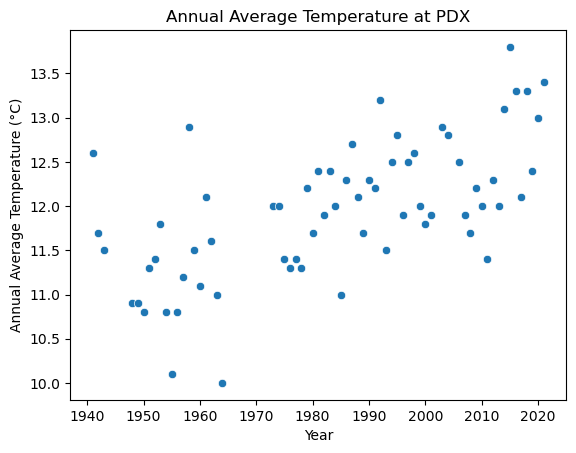

In [17]:
# Filter the DataFrame for rows where the 'Airport' is 'PDX'
pdx_temp = ap_temp[ap_temp['Airport'] == 'PDX']

# Create the scatterplot with 'Year' on the x-axis and 'T' (Temperature) on the y-axis
sns.scatterplot(data=pdx_temp, x='Year', y='T')
plt.title('Annual Average Temperature at PDX')
plt.xlabel('Year')
plt.ylabel('Annual Average Temperature (°C)')

# Display the plot
plt.show()

#### Question 2

The trend should generally appear positive *i.e.* that temperature is increasing with time at PDX. Because the relationship appears roughly linear, we could fit a simple linear model to better visualize that trend. 

Rather than find the model ourselves by solving for its parameters, using 'scikit-learn', or 'using statsmodel', use seaborn's `regplot` to visualize the relationship and plot a regression line automatically. Change the colors of the regression line and the points to anything you want, but make them different.

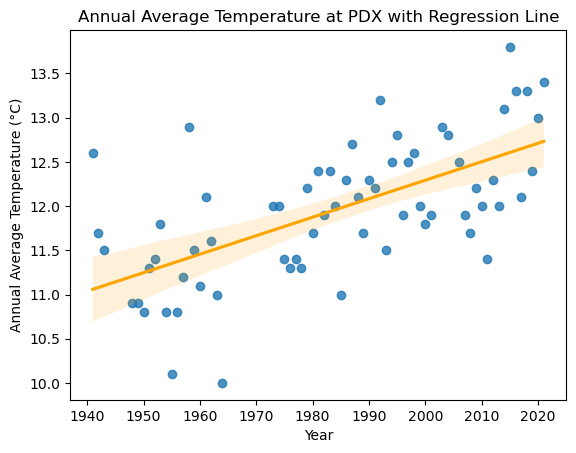

In [18]:
# Create the regression plot
# 'scatter_kws' controls the scatter points' appearance
# 'line_kws' controls the regression line's appearance
sns.regplot(data=pdx_temp, x='Year', y='T',line_kws={'color': 'orange'})
plt.title('Annual Average Temperature at PDX with Regression Line')
plt.xlabel('Year')
plt.ylabel('Annual Average Temperature (°C)')

# Display the plot
plt.show()

#### Question 3

In addition to temperature, climate change is also thought to be influencing patterns of precipitation. Specifically, some places might get drier and some places might get wetter. 

First, create a new variable called 'recent' in the full data indicating whether the record was before 1985 (inclusive) or after 1985. 

In [22]:
ap_temp['recent'] = np.where(ap_temp['Year'] > 1985, 'After 1985', 'Before 1985')

# Display the last few rows to verify the new column
ap_temp.tail()

,Year,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR,Airport,recent
122,2018,18.0,23.0,14.2,208.79,12.0,37.0,0.0,2.0,44.0,0.0,0.0,LAX,After 1985
123,2019,17.4,22.3,13.5,462.49,12.3,58.0,0.0,6.0,27.0,0.0,0.0,LAX,After 1985
124,2020,17.7,23.1,13.7,224.52,11.4,33.0,0.0,2.0,60.0,0.0,0.0,LAX,After 1985
125,2021,16.6,21.7,12.9,316.21,11.8,40.0,0.0,4.0,37.0,0.0,0.0,LAX,After 1985
126,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAX,After 1985


In [23]:
grader.check("q3")

q3 results: All test cases passed!

#### Question 4

Looking only at PDX, create two plots: a barplot of average annual temperatures before 1985 and after 1985; a boxplot of annual temperatures before 1985 and after 1985.

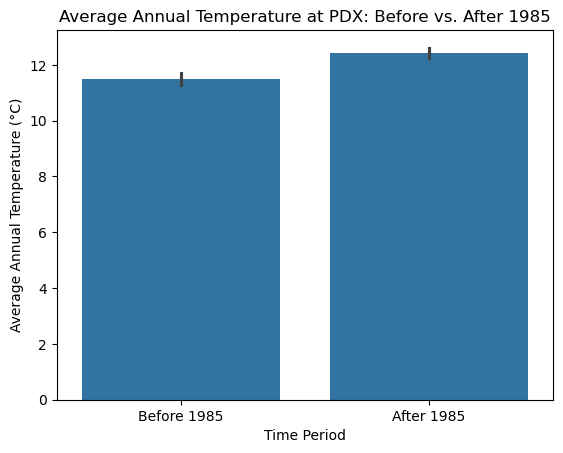

In [28]:
#Q 4.1: arplot
# Create the barplot with 'recent' on the x-axis and 'T' (Temperature) on the y-axis
sns.barplot(data=pdx_temp, x='recent', y='T')

# Add a title and labels
plt.title('Average Annual Temperature at PDX: Before vs. After 1985')
plt.xlabel('Time Period')
plt.ylabel('Average Annual Temperature (°C)')

# Display the plot
plt.show()



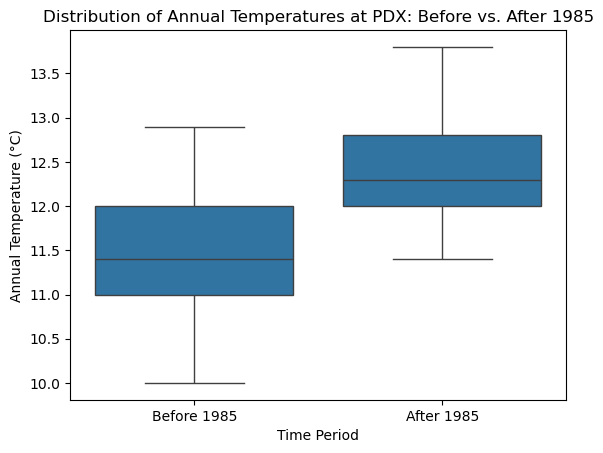

In [29]:
#Q 4.2: Box Plot

sns.boxplot(data=pdx_temp, x='recent', y='T')

# Add a title and labels
plt.title('Distribution of Annual Temperatures at PDX: Before vs. After 1985')
plt.xlabel('Time Period')
plt.ylabel('Annual Temperature (°C)')

# Display the plot
plt.show()

#### Question 5

Which of these plots do you think better represents the relationship of interest? Why?

**Your response:** I beleive the box plot has the best representation of the data because it shows the reality of the spread with mean, quartiles and more in relation to each other. The bor plot is too vauge and does not show enough difference.

#### Question 6

Replot either the barplot or the boxplot but orient the plot horizontally instead of vertically. Check the functions documentation to determine how to do this. 

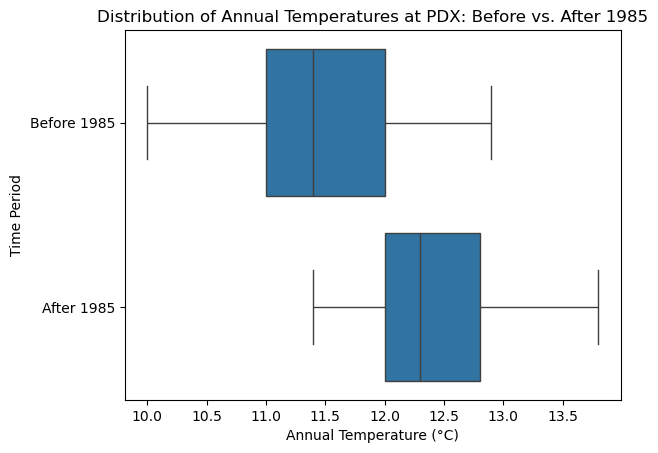

In [30]:
#Q 4.2: Box Plot

sns.boxplot(data=pdx_temp, x= 'T', y='recent')

# Add a title and labels
plt.title('Distribution of Annual Temperatures at PDX: Before vs. After 1985')
plt.ylabel('Time Period')
plt.xlabel('Annual Temperature (°C)')

# Display the plot
plt.show()

#### Question 7

Now create a single, grouped/paired boxplot (vertical or horizontal) showing the temperature at both PDX and LAX in both time periods. There should be 4 total boxes, and the boxplots should be grouped by airport.

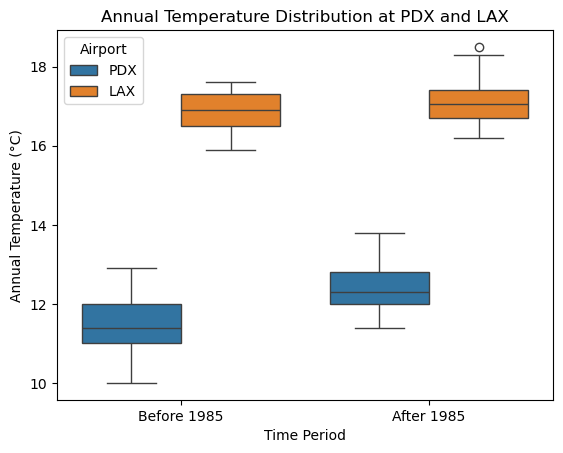

In [31]:
# Filter the DataFrame to include only rows for 'PDX' and 'LAX' airports
pdx_lax_temp = ap_temp[ap_temp['Airport'].isin(['PDX', 'LAX'])]

# Create the grouped boxplot
# x='recent' sets the time periods on the x-axis
# y='T' is the temperature value for the y-axis
# hue='Airport' creates separate, color-coded boxes for each airport
sns.boxplot(data=pdx_lax_temp, x='recent', y='T', hue='Airport')

# Add a descriptive title and axis labels
plt.title('Annual Temperature Distribution at PDX and LAX')
plt.xlabel('Time Period')
plt.ylabel('Annual Temperature (°C)')

# Display the plot
plt.show()

#### Question 8

Create a single `relplot` showing temperature `T` by year for both airports. Change the color of points based on their associated airports, and adjust the size of each point based on precipitation `PP`. Use a different color palette than the default one. 

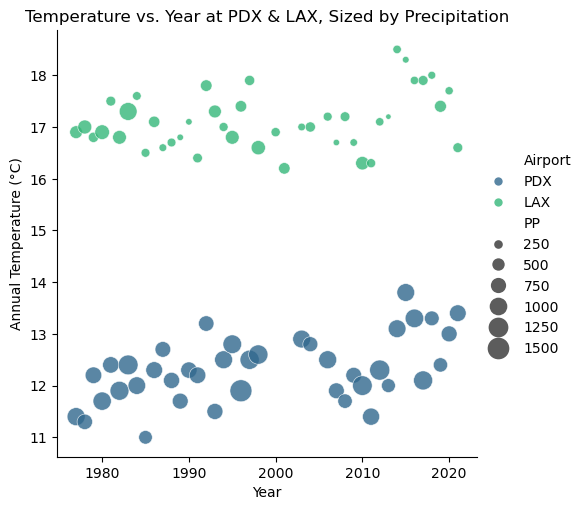

In [32]:
# Create the relational plot (relplot)
sns.relplot(data=pdx_lax_temp,
            x='Year', y='T', hue='Airport', size='PP',          
            palette='viridis',  
            sizes=(15, 250),
            alpha=0.8)

# Add a title and axis labels
plt.title('Temperature vs. Year at PDX & LAX, Sized by Precipitation')
plt.xlabel('Year')
plt.ylabel('Annual Temperature (°C)')

# Display the plot
plt.show()

#### Question 9.1

Now, create two plots, one for PDX (Portland) and one for LAX (Los Angeles). 

Each plot should show the **bivariate distributions of temperature (T) and precipitation (PP) for each time group** (before and after 1985) on the same plot. Check out Seaborn's [page on visualizing distributions](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to do this. 

Additionally, each plot should have **two points representing the averages of T and PP for each time group**. These will therefore represent the averages of each bivariate distribution. Ensure that the distributions and associated points **are different colors depending on whether they are from before or after 1985**. 

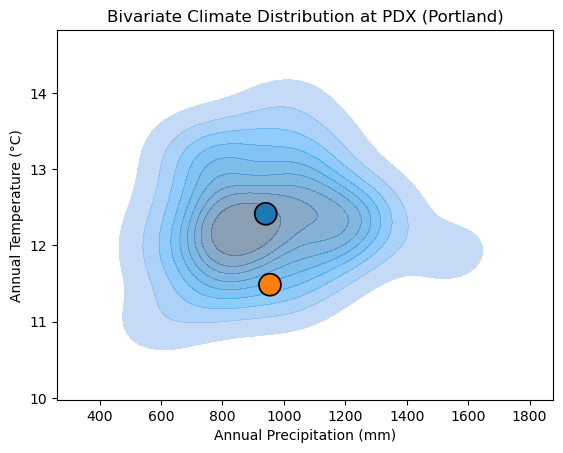

In [ ]:
# PDX bivariate plot

# Filter the data for PDX
pdx_data = ap_temp[ap_temp['Airport'] == 'PDX']

# Calculate the mean T and PP for each period
pdx_means = pdx_data.groupby('recent')[['T', 'PP']].mean().reset_index()

# Create the bivariate KDE plot
sns.kdeplot(data=pdx_data, x='PP', y='T', fill=True, alpha=0.6)

# Overlay the average points for each distribution
# We use the same hue to match colors and make the points large and visible
sns.scatterplot(data=pdx_means, x='PP', y='T', hue='recent', s=250, edgecolor='black', legend=False)

# Add titles and labels
plt.title('Bivariate Climate Distribution at PDX (Portland)')
plt.xlabel('Annual Precipitation (mm)')
plt.ylabel('Annual Temperature (°C)')
plt.show()

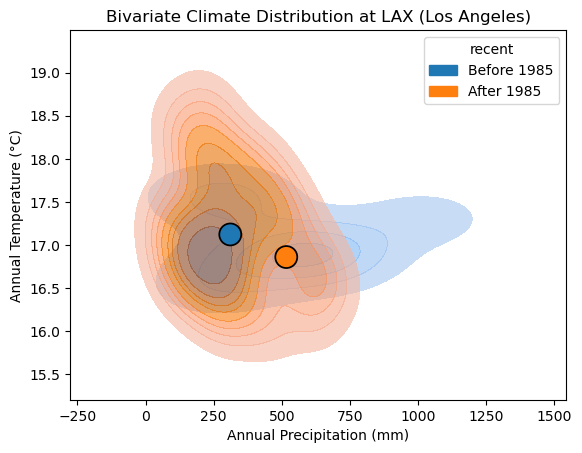

In [41]:
# LAX bivariate plot

# Filter the data for LAX
lax_data = ap_temp[ap_temp['Airport'] == 'LAX']

# Calculate the mean T and PP for each period
lax_means = lax_data.groupby('recent')[['T', 'PP']].mean().reset_index()

# Create the bivariate KDE plot
sns.kdeplot(data=lax_data, x='PP', y='T', hue='recent', fill=True, alpha=0.6)

# Overlay the average points for each distribution
sns.scatterplot(data=lax_means, x='PP', y='T', hue='recent', s=250, edgecolor='black', legend=False)

# Add titles and labels
plt.title('Bivariate Climate Distribution at LAX (Los Angeles)')
plt.xlabel('Annual Precipitation (mm)')
plt.ylabel('Annual Temperature (°C)')
plt.show()

#### Question 9.2

Looking at the bivariate distributions of climate at PDX and their centers, how would you say climate has changed at PDX from before 1985 to after 1985?

If you're unsure how to interpret the bivariate distributions, consider using scatterplots to help answer the question.

1. Climate has not changed
2. Climate has become warmer but not appreciably wetter or drier
3. Climate has become drier but not appreciably warmer or colder
4. Climate has become both warmer and drier
5. Climate has become both wetter and colder

In [35]:
ans_92 = 4

In [36]:
grader.check("q9_2")

q9_2 results: All test cases passed!

#### Question 9.3

Looking at the bivariate distributions of climate at LAX and their centers, how would you say climate has changed at LAX from before 1985 to after 1985?

Only select one answer, but there are two acceptable answers for this question.

1. Climate has not changed
2. Climate has become warmer but not appreciably wetter or drier
3. Climate has become drier but not appreciably warmer or colder
4. Climate has become both warmer and drier
5. Climate has become both wetter and colder

In [37]:
ans_93 = 4

In [38]:
grader.check("q9_3")

q9_3 results: All test cases passed!

In [39]:
grader.check_all()

q3 results: All test cases passed!

q9_2 results: All test cases passed!

q9_3 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order. Then execute the following two commands from the File menu:

* Save and Checkpoint
* Close and Halt

Then upload your .ipynb file to Canvas assignment HW3